# Python VTK tutorial

Note: you need to install *vtk* in your environment (either from the Anaconda packages, or via __conda install vtk__ or __pip install vtk__)

In [1]:
import vtk
from IPython.display import Image

# Rendering utility function (to visualize rendering on Jupyter notebook)
def vtk_show(renderer, width=800, height=600):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = memoryview(writer.GetResult()).tobytes()
    
    return Image(data)

## Render a cube

In [2]:
# Source
# Generate polygon data for a cube
cube = vtk.vtkCubeSource()

In [3]:
# Create a mapper
cube_mapper = vtk.vtkPolyDataMapper()
cube_mapper.SetInputConnection(cube.GetOutputPort())

In [4]:
# Actor
cube_actor = vtk.vtkActor()
cube_actor.SetMapper(cube_mapper)
cube_actor.GetProperty().SetColor(1.0, 0.0, 0.0)  # make the cube red

In [5]:
# Create a renderer and add the cube actor to it
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.0, 0.0, 0.0)  # make the background black
renderer.AddActor(cube_actor)

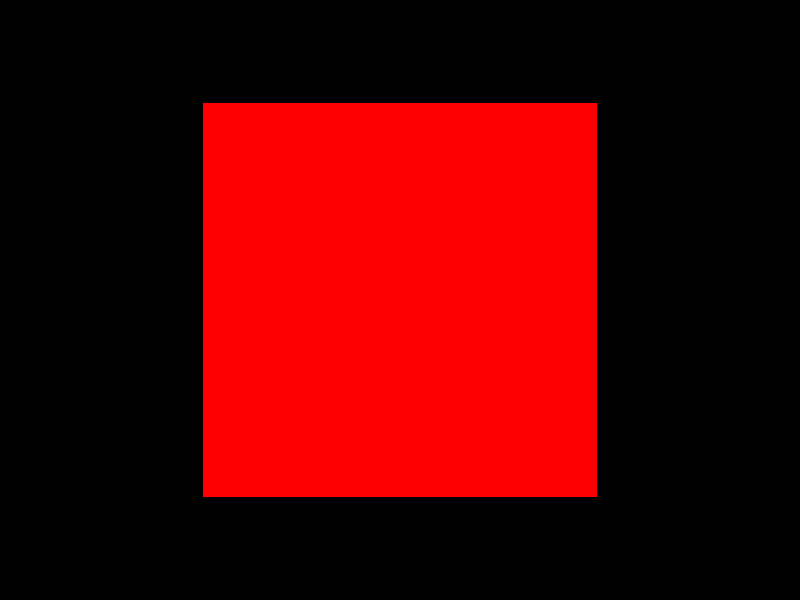

In [6]:
vtk_show(renderer)

## Basics: points, cells, lines

In [7]:
# Create a custom "source" dataset

points = vtk.vtkPoints() 
points.InsertPoint(0, 0.0, 0.0, 0.0) 
points.InsertPoint(1, 0.0, 1.0, 0.0) 
points.InsertPoint(2, 1.0, 0.0, 0.0) 
points.InsertPoint(3, 1.0, 2.0, 1.0) 
points.InsertPoint(4, 2.0, 0.0, 0.0) 
points.InsertPoint(5, 2.0, 2.0, -1.0) 
points.InsertPoint(6, 3.0, 0.0, 0.0) 
points.InsertPoint(7, 3.0, 1.0, 0.0)

In [8]:
cells = vtk.vtkCellArray() 
cells.InsertNextCell(8) # number of points 
cells.InsertCellPoint(0) 
cells.InsertCellPoint(1) 
cells.InsertCellPoint(2) 
cells.InsertCellPoint(3)
cells.InsertCellPoint(4)
cells.InsertCellPoint(5)
cells.InsertCellPoint(6) 
cells.InsertCellPoint(7)

In [22]:
strip = vtk.vtkPolyData() 
strip.SetPoints(points) 
strip.SetStrips(cells)

In [23]:
# Mapper
map = vtk.vtkPolyDataMapper()
map.SetInputData(strip)

In [24]:
# Actor
strip = vtk.vtkActor()
strip.SetMapper(map) 
strip.GetProperty().SetColor(0.3800, 0.7000, 0.1600)

In [25]:
# Renderer
ren = vtk.vtkRenderer() 
ren.AddActor(strip) 
ren.SetBackground(0.2, 0.15, 0.25)

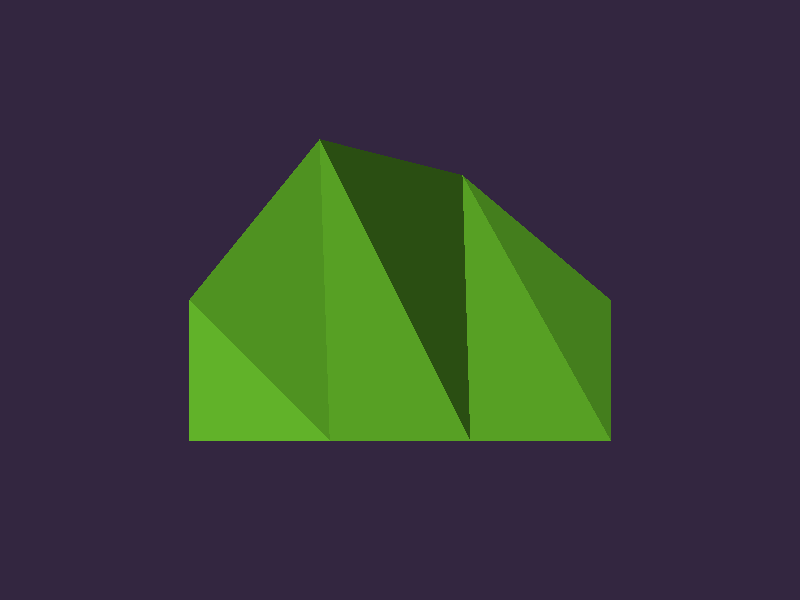

In [26]:
vtk_show(ren)

In [27]:
# Lines
lines = vtk.vtkPolyData()
lines.SetPoints(points) 
lines.SetLines(cells)

In [28]:
# Mapper
lineMapper = vtk.vtkPolyDataMapper() 
lineMapper.SetInputData(lines)

In [29]:
# Actor
lineActor = vtk.vtkActor() 
lineActor.SetMapper(lineMapper)
lineActor.GetProperty().SetColor(0.3800, 0.7000, 0.1600)

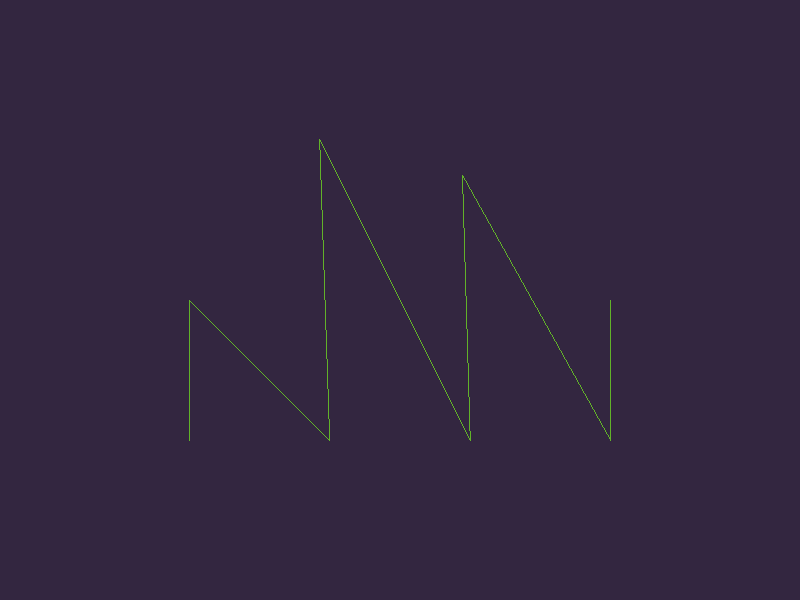

In [30]:
ren.AddActor(lineActor)
ren.RemoveActor(strip)
vtk_show(ren)

In [31]:
# Put spheres at each point in the dataset. 
ball = vtk.vtkSphereSource() 
ball.SetRadius(0.05) 
ball.SetThetaResolution(12) 
ball.SetPhiResolution(12)

# filter
ballGlyph = vtk.vtkGlyph3D()
ballGlyph.SetInputData(lines) 
ballGlyph.SetSourceConnection(ball.GetOutputPort())

In [32]:
# Mapper
ballMapper = vtk.vtkPolyDataMapper() 
ballMapper.SetInputConnection(ballGlyph.GetOutputPort())

In [33]:
# Actor
ballActor = vtk.vtkActor()
ballActor.SetMapper(ballMapper) 
ballActor.GetProperty().SetColor(0.8,0.4,0.4)

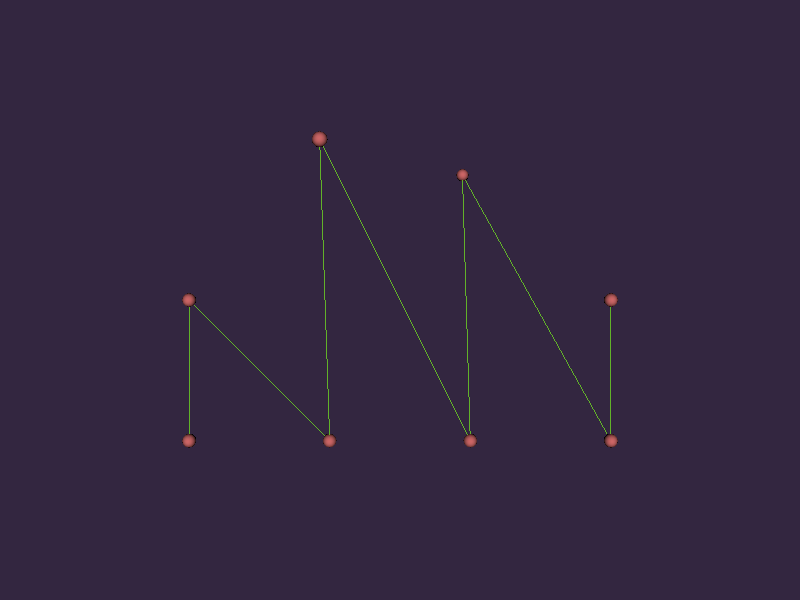

In [34]:
ren.AddActor(ballActor)
vtk_show(ren)

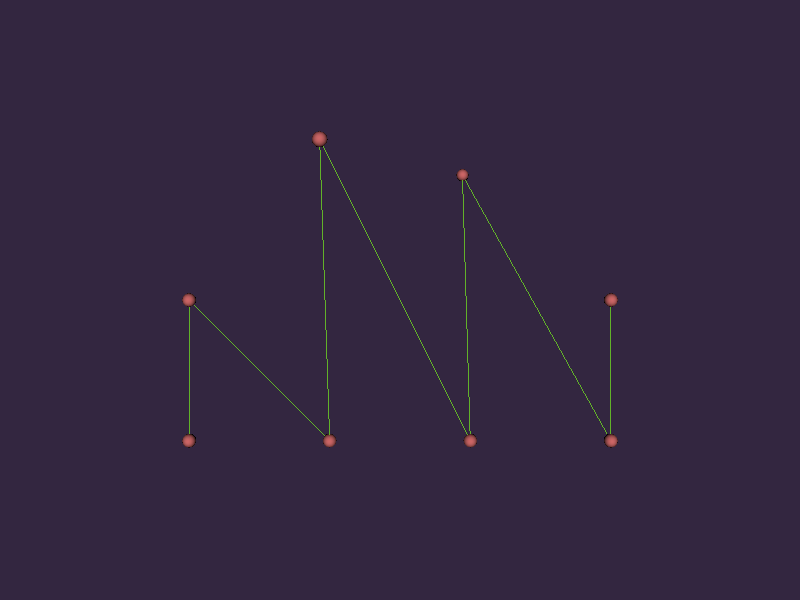

In [35]:
# Colour transfer function
colorTransferFunction = vtk.vtkColorTransferFunction() 
colorTransferFunction.AddRGBPoint(-0.8 , 0.0, 0.0, 1.0) 
colorTransferFunction.AddRGBPoint(-0.5, 0.0, 1.0, 1.0) 
colorTransferFunction.AddRGBPoint(0.0, 0.0, 1.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.50, 1.0, 1.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.70, 1.0, 0.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.89, 1.0, 0.0, 1.0)

# Set colors depending on the color transfer functions 
ballMapper.SetLookupTable(colorTransferFunction)
vtk_show(ren)

## Using a data source

In [36]:
# This import style makes it possible to write just readPoints 
from ReadPoints import *
# Read the data into a vtkPolyData using the functions in ReadPoints.py 

data = vtk.vtkUnstructuredGrid()
data.SetPoints(readPoints("Data1.txt")) 
data.GetPointData().SetVectors(readVectors("Data2.txt"))

0

In [37]:
# Source
ball = vtk.vtkSphereSource()
ball.SetRadius(0.05)
ball.SetThetaResolution(12)
ball.SetPhiResolution(12)

ballGlyph = vtk.vtkGlyph3D()
ballGlyph.SetInputData(data)
ballGlyph.SetSourceConnection(ball.GetOutputPort())

# Mapper
ballMapper = vtk.vtkPolyDataMapper()
ballMapper.SetInputConnection(ballGlyph.GetOutputPort())

# Actor
ballActor = vtk.vtkActor()
ballActor.SetMapper(ballMapper)
ballActor.GetProperty().SetColor(0.8,0.4,0.4)

In [38]:
dir(ball)

['AbortExecuteOff',
 'AbortExecuteOn',
 'AddInputConnection',
 'AddInputData',
 'AddInputDataObject',
 'AddObserver',
 'BreakOnError',
 'CAN_HANDLE_PIECE_REQUEST',
 'CAN_PRODUCE_SUB_EXTENT',
 'ConvertTotalInputToPortConnection',
 'DEFAULT_PRECISION',
 'DOUBLE_PRECISION',
 'DebugOff',
 'DebugOn',
 'DesiredOutputPrecision',
 'FastDelete',
 'GenerateNormalsOff',
 'GenerateNormalsOn',
 'GetAbortExecute',
 'GetAddressAsString',
 'GetCenter',
 'GetClassName',
 'GetCommand',
 'GetDebug',
 'GetEndPhi',
 'GetEndPhiMaxValue',
 'GetEndPhiMinValue',
 'GetEndTheta',
 'GetEndThetaMaxValue',
 'GetEndThetaMinValue',
 'GetErrorCode',
 'GetExecutive',
 'GetGenerateNormals',
 'GetGlobalWarningDisplay',
 'GetInformation',
 'GetInput',
 'GetInputAlgorithm',
 'GetInputArrayInformation',
 'GetInputConnection',
 'GetInputDataObject',
 'GetInputExecutive',
 'GetInputInformation',
 'GetInputPortInformation',
 'GetIsInMemkind',
 'GetLatLongTessellation',
 'GetMTime',
 'GetNumberOfGenerationsFromBase',
 'GetNumbe

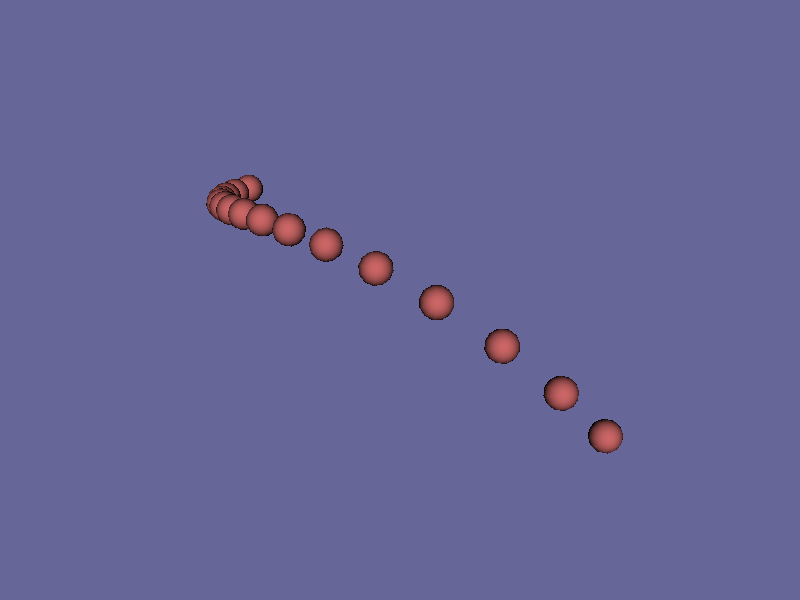

In [39]:
ren = vtk.vtkRenderer()
ren.AddActor(ballActor)
ren.SetBackground(0.4, 0.4, 0.6)
vtk_show(ren)

In [40]:
#Put an arrow (vector) at each ball.

# source
arrow = vtk.vtkArrowSource()
arrow.SetTipRadius(0.2)
arrow.SetShaftRadius(0.075)
#filter
arrowGlyph = vtk.vtkGlyph3D()
arrowGlyph.SetInputData(data)
arrowGlyph.SetSourceConnection(arrow.GetOutputPort())
arrowGlyph.SetScaleFactor(0.2)
# mapper
arrowMapper = vtk.vtkPolyDataMapper()
arrowMapper.SetInputConnection(arrowGlyph.GetOutputPort())
# actor
arrowActor = vtk.vtkActor()
arrowActor.SetMapper(arrowMapper)
arrowActor.GetProperty().SetColor(0.9,0.9,0.1)

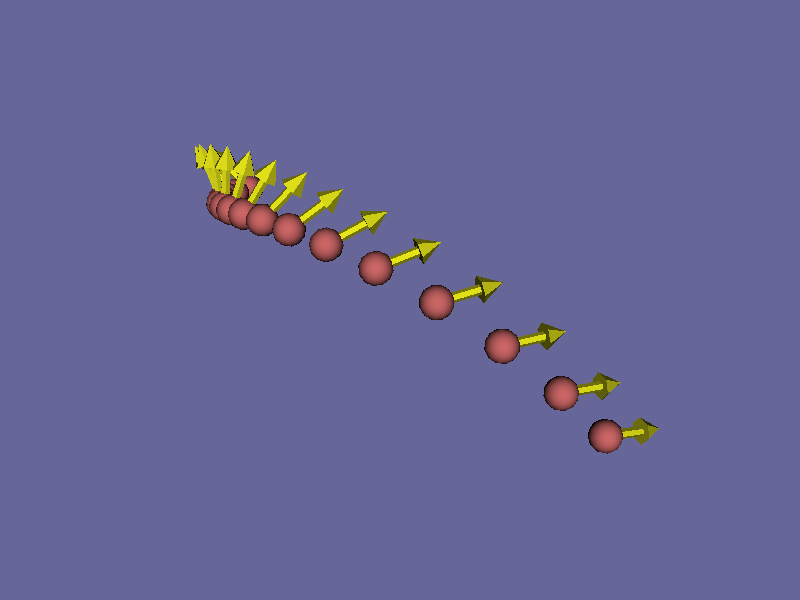

In [41]:
ren.AddActor(arrowActor)
vtk_show(ren)

In [42]:
scalars = readScalars("Data3.txt")
data.GetPointData().SetScalars(scalars)
scalars.GetRange()

(-0.82669997215271, 0.8934999704360962)

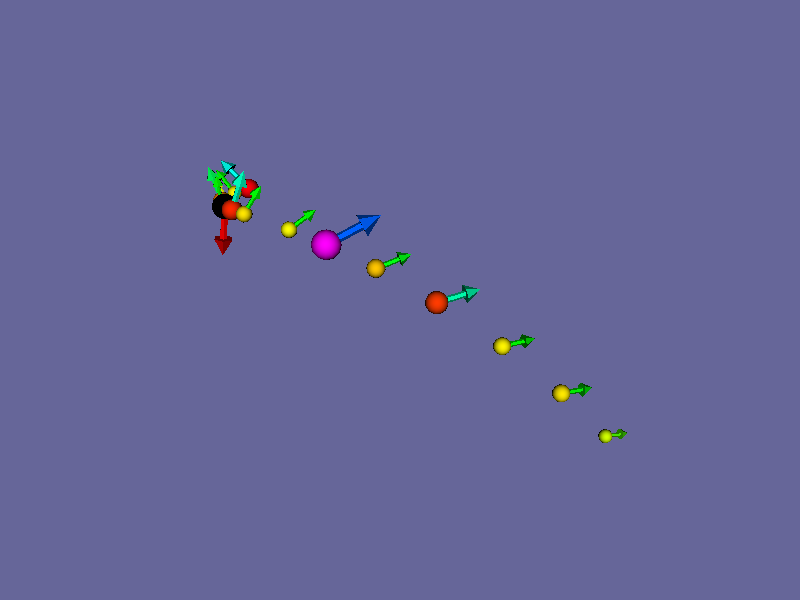

In [43]:
# Create a color transfer function to be used for both the balls and arrows. 

colorTransferFunction = vtk.vtkColorTransferFunction() 
colorTransferFunction.AddRGBPoint(-0.8 , 0.0, 0.0, 1.0) 
colorTransferFunction.AddRGBPoint(-0.5, 0.0, 1.0, 1.0) 
colorTransferFunction.AddRGBPoint(0.0, 0.0, 1.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.50, 1.0, 1.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.70, 1.0, 0.0, 0.0) 
colorTransferFunction.AddRGBPoint(0.89, 1.0, 0.0, 1.0)

# Set colors depending on the color transfer functions 
ballMapper.SetLookupTable(colorTransferFunction)

ballActor.SetMapper(ballMapper)
vtk_show(ren)

## Working with a volume

In [45]:
# Read the volume dataset
filename = "hydrogen.vtk"
reader = vtk.vtkStructuredPointsReader()
reader.SetFileName(filename)
print("Reading volume dataset from " + filename + " ...")
reader.Update()  # executes the reader
print("Done!")

Reading volume dataset from hydrogen.vtk ...
Done!


In [46]:
# Just for illustration, extract and print the dimensions of the
# volume. The string formatting used here is similar to the sprintf
# style in C.
width, height, depth = reader.GetOutput().GetDimensions()
print("Dimensions: %i %i %i" % (width, height, depth))

Dimensions: 64 64 64


In [47]:
# Create an outline of the volume
# filter
outline = vtk.vtkOutlineFilter()
outline.SetInputConnection(reader.GetOutputPort())

In [48]:
# mapper
outline_mapper = vtk.vtkPolyDataMapper()
outline_mapper.SetInputConnection(outline.GetOutputPort())

In [49]:
# actor
outline_actor = vtk.vtkActor()
outline_actor.SetMapper(outline_mapper)
# Define actor properties (color, shading, line width, etc)
outline_actor.GetProperty().SetColor(0.8, 0.8, 0.8)
outline_actor.GetProperty().SetLineWidth(2.0)

In [50]:
# Create a renderer and add the actors to it
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.2, 0.2, 0.2)
renderer.AddActor(outline_actor)

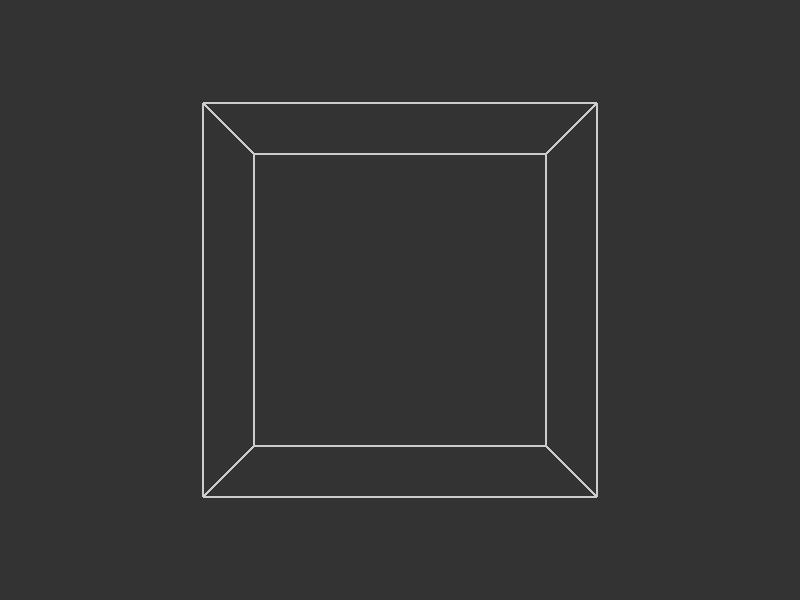

In [51]:
vtk_show(renderer)

In [52]:
# Range of the data
data = reader.GetOutput()
a,b = data.GetScalarRange()
print("Range of image: %d--%d" %(a,b))

Range of image: 0--1


In [53]:
# use the scalar data as a numpy array
from vtk.util.numpy_support import vtk_to_numpy

rows, cols, _ = data.GetDimensions()
sc = data.GetPointData().GetScalars()
ar = vtk_to_numpy(sc)
print("initial shape", ar.shape)
ar = ar.reshape(rows,cols,-1)
print("reshaped", ar.shape)

initial shape (262144,)
reshaped (64, 64, 64)


<IPython.core.display.Javascript object>


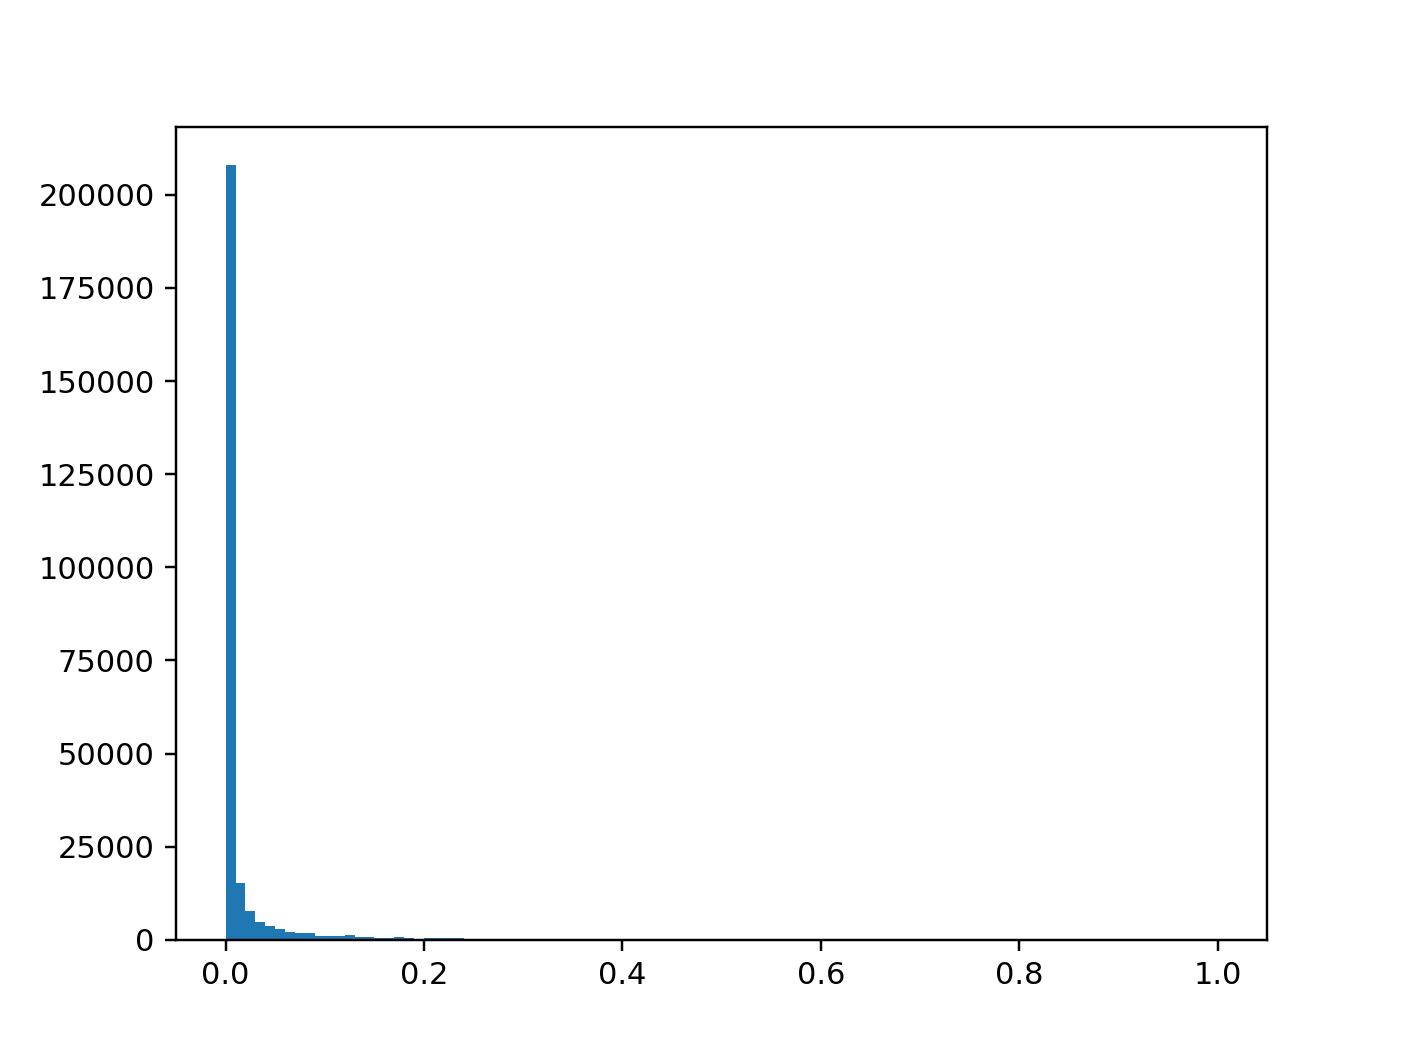

(array([2.0788e+05, 1.5304e+04, 7.6160e+03, 4.8800e+03, 3.5840e+03,
        2.9600e+03, 2.0080e+03, 1.9120e+03, 1.7120e+03, 1.1600e+03,
        1.1280e+03, 9.6000e+02, 1.2320e+03, 6.7200e+02, 6.9600e+02,
        5.7600e+02, 5.6800e+02, 6.4800e+02, 5.9200e+02, 3.2000e+02,
        4.4000e+02, 4.7200e+02, 4.0800e+02, 4.1600e+02, 2.2400e+02,
        2.9600e+02, 3.2000e+02, 2.4800e+02, 1.4400e+02, 8.0000e+01,
        1.9200e+02, 1.2800e+02, 9.6000e+01, 5.6000e+01, 8.8000e+01,
        3.2000e+01, 1.1200e+02, 6.4000e+01, 6.4000e+01, 8.8000e+01,
        9.6000e+01, 7.2000e+01, 7.2000e+01, 7.2000e+01, 5.6000e+01,
        4.8000e+01, 4.8000e+01, 0.0000e+00, 1.0400e+02, 1.6000e+01,
        4.8000e+01, 6.4000e+01, 2.4000e+01, 5.6000e+01, 3.2000e+01,
        3.2000e+01, 4.8000e+01, 5.6000e+01, 4.0000e+01, 2.4000e+01,
        1.6000e+01, 4.8000e+01, 1.6000e+01, 3.2000e+01, 3.2000e+01,
        0.0000e+00, 3.2000e+01, 4.0000e+01, 2.4000e+01, 4.0000e+01,
        1.6000e+01, 1.6000e+01, 6.4000e+01, 0.00

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.hist(ar.flatten(),100)

In [57]:
# Create transfer mapping scalar value to opacity.
opacityTransferFunction = vtk.vtkPiecewiseFunction()
opacityTransferFunction.AddPoint(0, 0.0)
opacityTransferFunction.AddPoint(1, 0.2)

# Create transfer mapping scalar value to color.
colorTransferFunction = vtk.vtkColorTransferFunction()
colorTransferFunction.AddRGBPoint(0.0, 0.0, 0.0, 0.0)
colorTransferFunction.AddRGBPoint(0.25, 1.0, 0.0, 0.0)
colorTransferFunction.AddRGBPoint(0.5, 0.0, 0.0, 1.0)
colorTransferFunction.AddRGBPoint(0.75, 0.0, 1.0, 0.0)
colorTransferFunction.AddRGBPoint(1.0, 0.0, 0.2, 0.0)

4

In [58]:
# The property describes how the data will look.
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorTransferFunction)
volumeProperty.SetScalarOpacity(opacityTransferFunction)
volumeProperty.ShadeOn()
volumeProperty.SetInterpolationTypeToLinear()

In [59]:
# The mapper / ray cast function know how to render the data.
volumeMapper = vtk.vtkFixedPointVolumeRayCastMapper()
volumeMapper.SetInputConnection(reader.GetOutputPort())

In [60]:
# The volume holds the mapper and the property and
# can be used to position/orient the volume.
myvolume = vtk.vtkVolume()
myvolume.SetMapper(volumeMapper)
myvolume.SetProperty(volumeProperty)

In [61]:
renderer.AddVolume(myvolume)

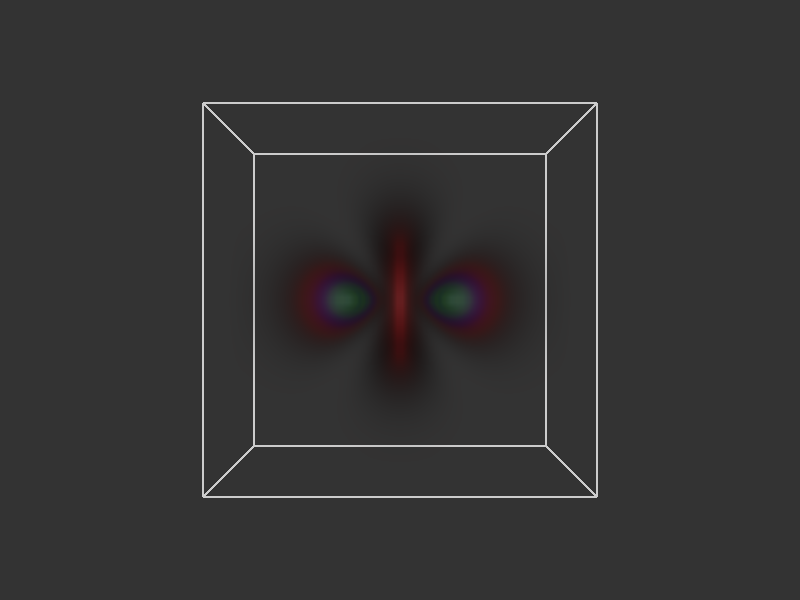

In [62]:
vtk_show(renderer)

In [63]:
# create the scalar_bar
scalar_bar = vtk.vtkScalarBarActor()
scalar_bar.SetOrientationToHorizontal()
scalar_bar.SetLookupTable(colorTransferFunction)

# create the scalar_bar_widget
scalar_bar_widget = vtk.vtkScalarBarWidget()
scalar_bar_widget.SetScalarBarActor(scalar_bar)

scalar_bar_widget.On()

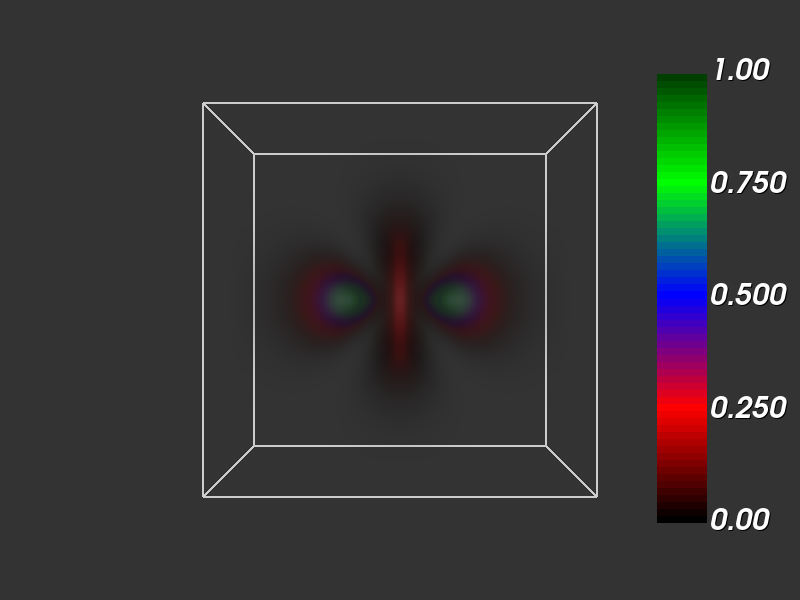

In [64]:
renderer.AddActor(scalar_bar)
vtk_show(renderer)

In [65]:
# Isosurface
isoSurface = vtk.vtkContourFilter()
isoSurface.SetInputConnection(reader.GetOutputPort())
isoSurface.SetValue(0, 0.5)
isoMapper = vtk.vtkPolyDataMapper()
isoMapper.SetInputConnection(isoSurface.GetOutputPort())
isoActor = vtk.vtkActor()
isoActor.SetMapper(isoMapper)
renderer.AddActor(isoActor)

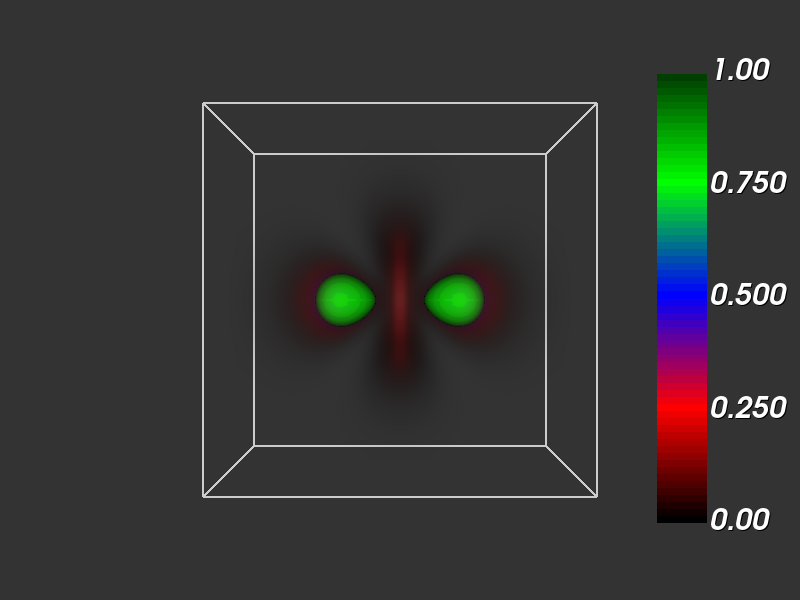

In [66]:
vtk_show(renderer)

In [67]:
def show_iso(value):
    isoSurface.SetValue(0, value)
    isoSurface.Update()
    v=vtk_show(renderer)
    display(v)

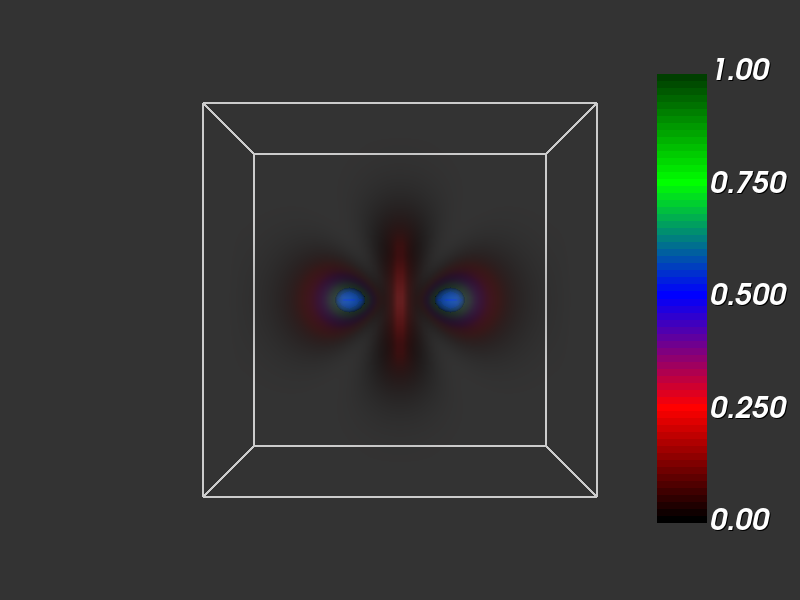

In [68]:
show_iso(0.9)

In [69]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [70]:
iso_widget=widgets.FloatSlider(min=a, max=b, step=0.1, value=(b-a)/2)

In [71]:
interact(show_iso, value=iso_widget)

interactive(children=(FloatSlider(value=0.5, description='value', max=1.0), Output()), _dom_classes=('widget-i…

<function __main__.show_iso(value)>